# Linear Regression

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def mean_squared_error(features, target, weights):
    """Computes Mean Squared Error for Linear Regression

    Args:
        features: numpy array of predictor values
        target: numpy array of response values
        weights: weights to estimate target 

    Returns:
        Mean Squared Error

    """
    N = len(features)
    loss = target - np.dot(features, weights)
    mse = (1/(2*N)) * np.sum(loss ** 2)
    
    return mse

# Generate Some Data

In [81]:
np.random.seed(16)
num_observations = 500

data = np.random.multivariate_normal([0, 0], [[1, .9],[.9, 1]], num_observations)
x = np.vstack(data[:, 0])
y = data[:, 1]

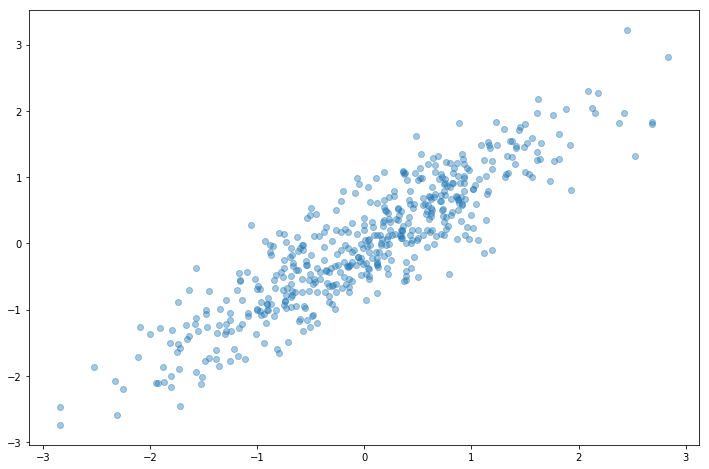

In [82]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, alpha = .4)

## Linear Regression

Can be extended for multiple features

In [83]:
def linear_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.vstack(np.ones((features.shape[0])))
        features = np.hstack((intercept, features))
        
    weights = np.zeros([features.shape[1]])
    m = features.shape[0]  # number of training examples
    
    for step in range(num_steps):
        # Update weights with gradient
        error = target - np.dot(features, weights)
        gradient = (-1/m) * np.dot(features.T, error)
        weights -= learning_rate * gradient
        
        # Print error every so often
        if step % 10000 == 0:
            print("Step {0} - MSE: {1:.5f}".format(step, mean_squared_error(features, target, weights)))
        
    return weights

In [84]:
weights = linear_regression(x, y, num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

Step 0 - MSE: 0.47488
Step 10000 - MSE: 0.24123
Step 20000 - MSE: 0.15143
Step 30000 - MSE: 0.11689
Step 40000 - MSE: 0.10361
Step 50000 - MSE: 0.09850
Step 60000 - MSE: 0.09653
Step 70000 - MSE: 0.09577
Step 80000 - MSE: 0.09548
Step 90000 - MSE: 0.09537
Step 100000 - MSE: 0.09532
Step 110000 - MSE: 0.09531
Step 120000 - MSE: 0.09530
Step 130000 - MSE: 0.09530
Step 140000 - MSE: 0.09530
Step 150000 - MSE: 0.09530
Step 160000 - MSE: 0.09530
Step 170000 - MSE: 0.09530
Step 180000 - MSE: 0.09530
Step 190000 - MSE: 0.09530
Step 200000 - MSE: 0.09530
Step 210000 - MSE: 0.09530
Step 220000 - MSE: 0.09530
Step 230000 - MSE: 0.09530
Step 240000 - MSE: 0.09530
Step 250000 - MSE: 0.09530
Step 260000 - MSE: 0.09530
Step 270000 - MSE: 0.09530
Step 280000 - MSE: 0.09530
Step 290000 - MSE: 0.09530


In [85]:
# Add intercept to data
intercept = np.vstack(np.ones((x.shape[0])))
x_int = np.hstack((intercept, x))

print(mean_squared_error(x_int, y, weights))

0.09529718834978314


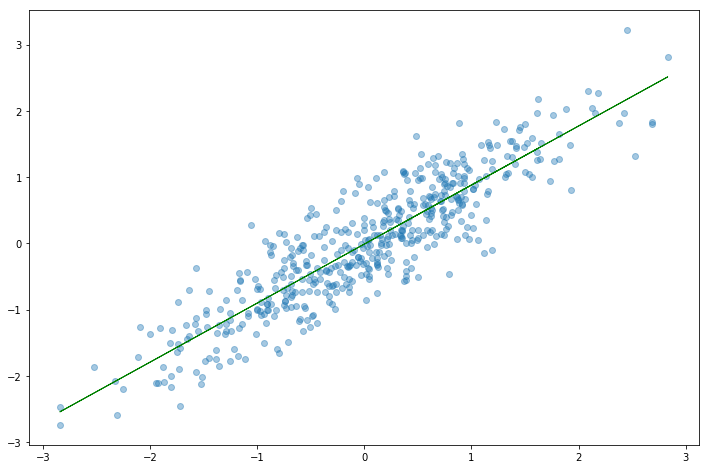

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, alpha = .4)
plt.plot(x, np.dot(x_int, weights), color='g', linestyle='-', lw = 1)

In [87]:
print("y = {0:.4f} + {1:.4f}x".format(weights[0], weights[1]))

y = -0.0103 + 0.8913x
